In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
sns.color_palette("rocket")
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv('C:\\Users\\Familia\\Desktop\\data.csv')

In [3]:
train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print(train.shape)

(569, 33)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
train.diagnosis = [1 if each == "M" else 0 for each in train.diagnosis]
train.drop(["Unnamed: 32", 'id'], axis=1, inplace=True) 
train.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


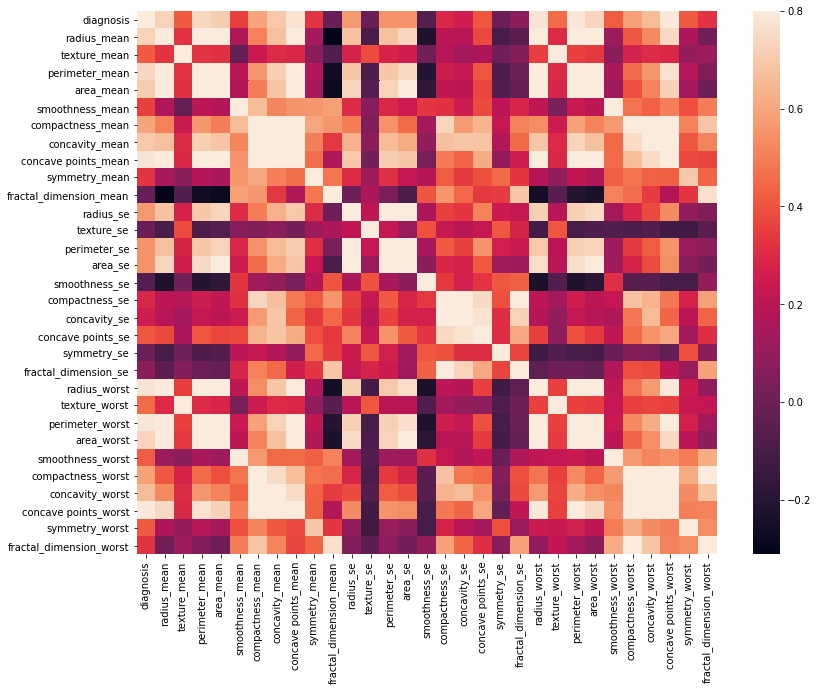

In [7]:
plt.figure(figsize=(13,10))
sns.heatmap(train.corr(), vmax=0.8)

In [8]:
train.corr()['diagnosis'].sort_values(ascending=False).head(11)

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

In [9]:
features_mean=list(train.columns[1:11])
# split dataframe into two based on diagnosis
trainM=train[train['diagnosis'] ==1]
trainB=train[train['diagnosis'] ==0]


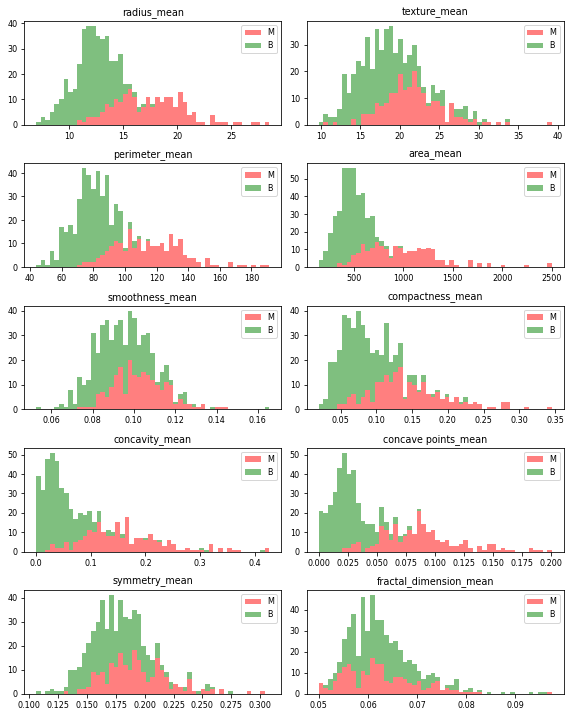

In [10]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(train[features_mean[idx]]) - min(train[features_mean[idx]]))/50
    ax.hist([trainM[features_mean[idx]],trainB[features_mean[idx]]], bins=np.arange(min(train[features_mean[idx]]), max(train[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,color=['r','g'],stacked=True, label=['M','B'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

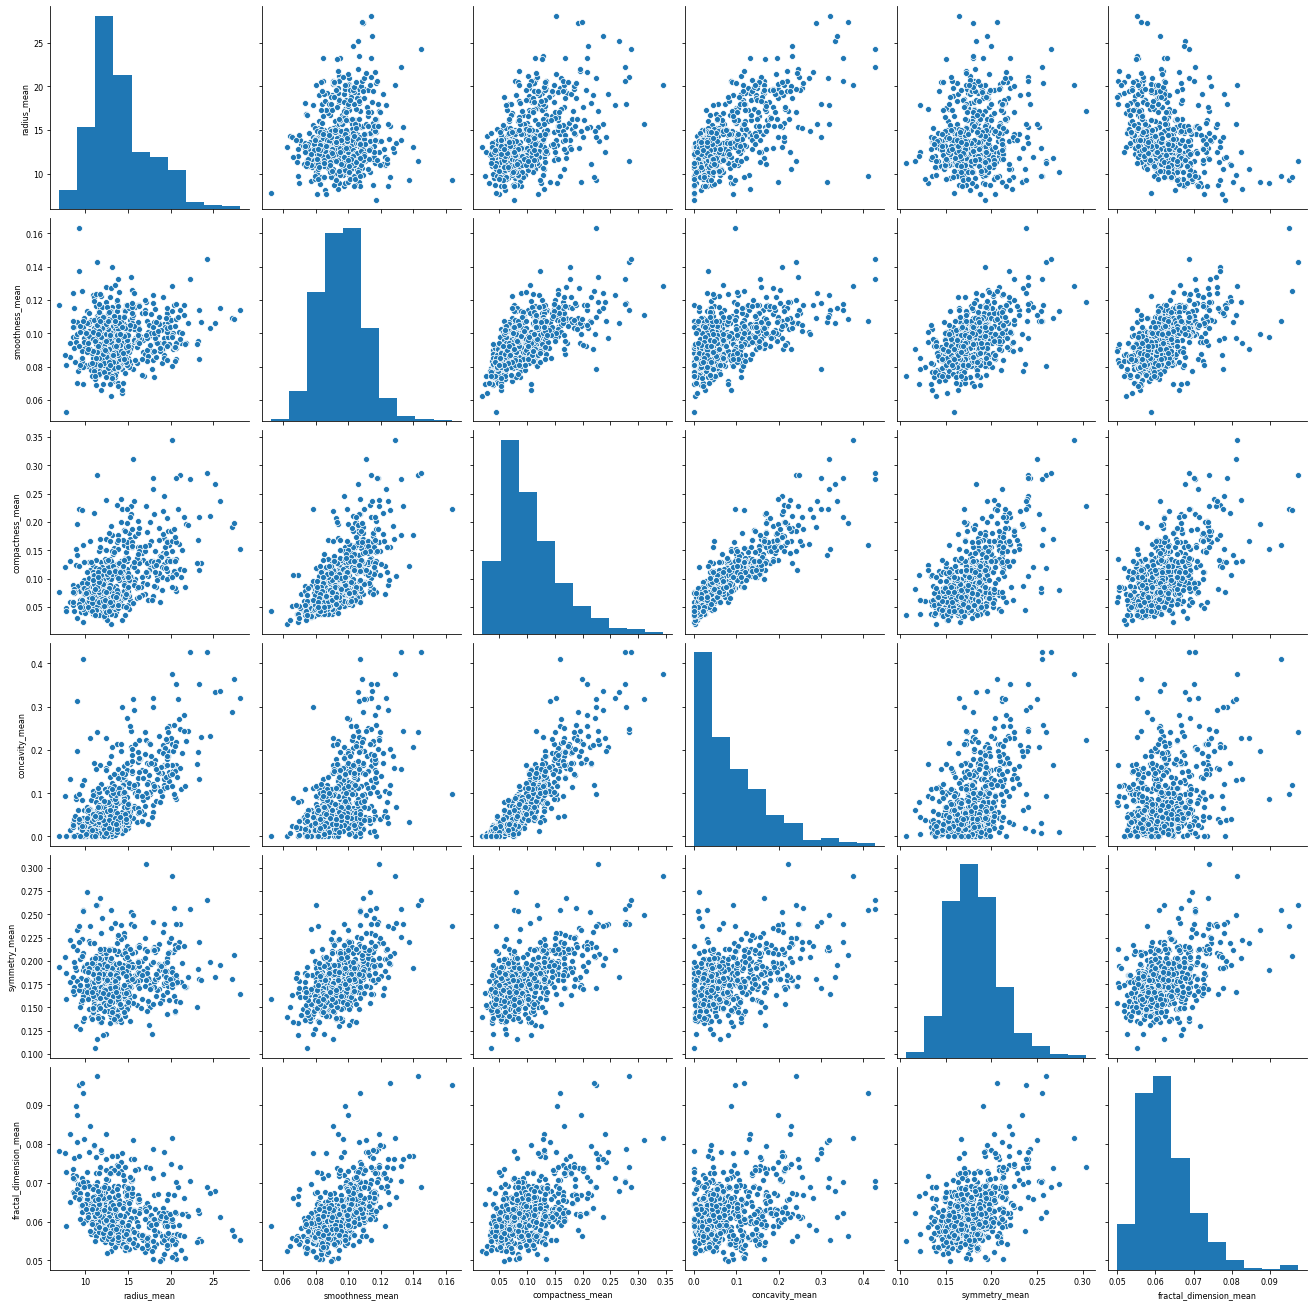

In [11]:
scatter_feature=['radius_mean','smoothness_mean','compactness_mean','concavity_mean','symmetry_mean','fractal_dimension_mean']
# Use sns.pairplot to check the relationship between the SalePrice and top 10 correlated features
sns.pairplot(train[scatter_feature],height=3)


In [12]:
# Check the NAN values as percentage
train_nan_pct=(train.isnull().sum())/(train.isnull().count())
train_nan_pct=train_nan_pct[train_nan_pct>0]
train_nan_pct.sort_values(ascending=False)

Series([], dtype: float64)

In [13]:
#train_impute_index=train_nan_pct[train_nan_pct<0.2].index
#train_impute_median=['concave points_worst', 'perimeter_worst ','concave points_mean ','radius_worst','perimeter_mean','area_worst','radius_mean','area_mean','concavity_mean','concavity_worst']

In [14]:
train.isnull().sum().sort_values(ascending=False).head(5)

fractal_dimension_worst    0
area_se                    0
radius_mean                0
texture_mean               0
perimeter_mean             0
dtype: int64

In [15]:
all_features = train.drop('diagnosis',axis=1)

In [16]:
all_features = pd.get_dummies(all_features, drop_first=True)

In [17]:
train_features = all_features[0:train.shape[0]]

In [18]:
all_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


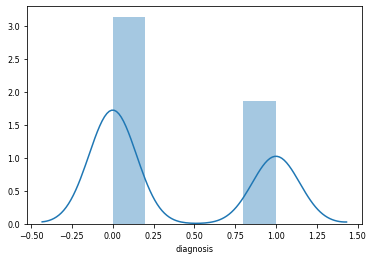

In [19]:
sns.distplot(train['diagnosis'])

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train[['diagnosis']], test_size=0.3, random_state=100)

In [46]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(max_iter=10000)

# We train the model
logreg.fit(X_train,np.ravel(y_train))

# We predict target values
Y_predict1 = logreg.predict(X_val)

In [22]:
from sklearn.metrics import mean_squared_error
print('Root Mean squared error for random forest regression :', np.sqrt(mean_squared_error(Y_predict1, y_val)))

Root Mean squared error for random forest regression : 0.21629522817435004


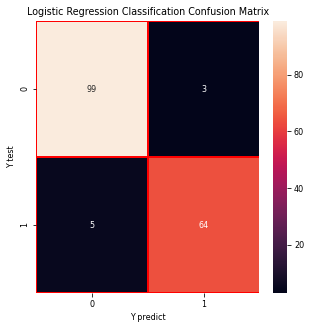

In [23]:
from sklearn.metrics import confusion_matrix

logreg_cm = confusion_matrix(y_val, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax)
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [24]:
#precision
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_val, Y_predict1)

print('Average precision score: {0:0.2f}'.format(
      average_precision))

Average precision score: 0.92


In [25]:
forest = RandomForestClassifier(n_estimators=100,random_state=1,n_jobs=-1)
forest.fit(X_train,np.ravel(y_train))
forest_train_pred=forest.predict(X_val)

In [26]:
from sklearn.metrics import mean_squared_error
print('Root Mean squared error for random forest regression :', np.sqrt(mean_squared_error(forest_train_pred, y_val)))

Root Mean squared error for random forest regression : 0.22941573387056177


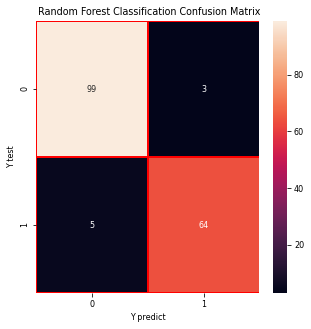

In [27]:
rf_cm = confusion_matrix(y_val,forest_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax)
plt.title(' Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [28]:
#precision
average_precision = average_precision_score(y_val, forest_train_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.91


<H1>Random Forest Regressor</H1>

In [29]:
#RF R
all_features = train.drop('radius_mean',axis=1)
all_features = pd.get_dummies(all_features, drop_first=True)
train_features = all_features[0:train.shape[0]]
all_features.head()

,diagnosis,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


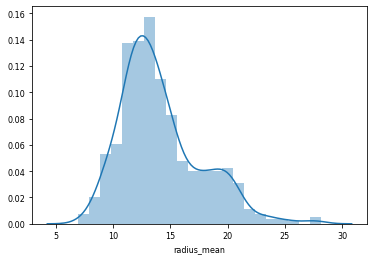

In [30]:
sns.distplot(train['radius_mean'])

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train[['radius_mean']], test_size=0.3, random_state=100)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
simple_regression_model = LinearRegression().fit(X_train, y_train)
simple_linear_preds = simple_regression_model.predict(X_val)
print('Mean squared error for simple linear regression :', np.sqrt(mean_squared_error(simple_linear_preds, y_val)))

Mean squared error for simple linear regression : 0.07165282912666199


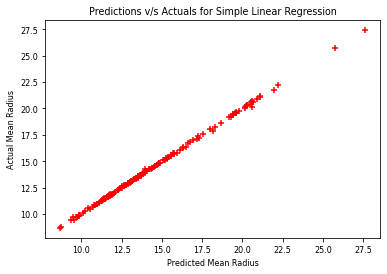

In [33]:
plt.scatter(simple_linear_preds, y_val,color='r', marker='+')
plt.title("Predictions v/s Actuals for Simple Linear Regression")
plt.xlabel("Predicted Mean Radius")
plt.ylabel("Actual Mean Radius")
plt.show()

In [34]:
forest = RandomForestRegressor(n_estimators=100,random_state=1,n_jobs=-1)
forest.fit(X_train,np.ravel(y_train))
forest_train_pred=forest.predict(X_val)

In [35]:
from sklearn.metrics import mean_squared_error
print('Mean squared error for random forest regression :', np.sqrt(mean_squared_error(forest_train_pred, y_val)))

Mean squared error for random forest regression : 0.18971919426333675


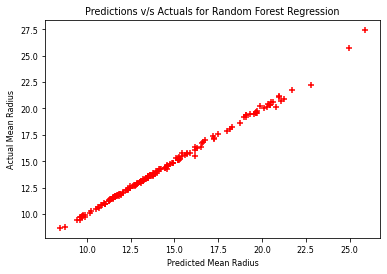

In [36]:
plt.scatter(forest_train_pred, y_val,color='r', marker='+')
plt.title("Predictions v/s Actuals for Random Forest Regression")
plt.xlabel("Predicted Mean Radius")
plt.ylabel("Actual Mean Radius")
plt.show()

In [47]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [48]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [49]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs = 4)


In [50]:
rf_Grid.fit(X_train, y_train)


Fitting 3 folds for each of 320 candidates, totalling 960 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    4.0s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:   20.1s
[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   46.5s
[Parallel(n_jobs=4)]: Done 960 out of 960 | elapsed:  1.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134,
                                          150]},
             verbose=2)

In [51]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 118}

In [54]:
rf_model = RandomForestClassifier(bootstrap = True,
 max_depth= 4,
 max_features= 'auto',
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 118)
rf_model.fit(X_train,np.ravel(y_train))
forest_train_pred=rf_model.predict(X_val)


In [55]:
print('Root Mean squared error for random forest regression :', np.sqrt(mean_squared_error(forest_train_pred, y_val)))

Root Mean squared error for random forest regression : 0.0


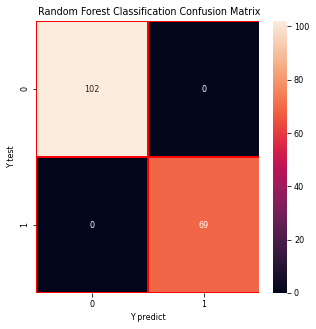

In [57]:
rf_cm = confusion_matrix(y_val,forest_train_pred)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='red', fmt='g', ax=ax)
plt.title(' Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()